<a href="https://colab.research.google.com/github/AlanKopiler/alura/blob/main/Aula_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)


## **Desafio 1**

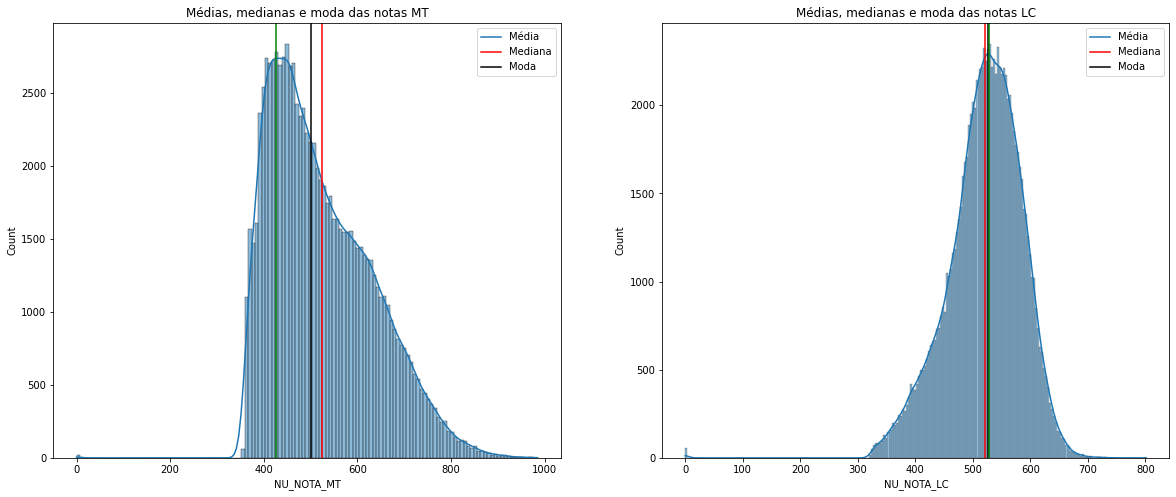

<Figure size 864x576 with 0 Axes>

In [5]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
provas.append("NU_NOTA_TOTAL")
dados[provas].query("NU_NOTA_TOTAL == 0")
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")

fig, axes = plt.subplots(1, 2, figsize=(20,8))

plt.figure(figsize=(12,8))
sns.histplot(ax= axes[0], x = "NU_NOTA_MT", data=dados_sem_notas_zero, kde=True)
mediaMT = dados_sem_notas_zero["NU_NOTA_MT"].mean()
medianMT = dados_sem_notas_zero["NU_NOTA_MT"].median()
modeMT = float(dados_sem_notas_zero["NU_NOTA_MT"].mode())
axes[0].axvline(mediaMT, ymin=0, ymax=1, c= 'red')
axes[0].axvline(medianMT, ymin=0, ymax=1, c= 'black')
axes[0].axvline(modeMT, ymin=0, ymax=1, c= 'green')
axes[0].set_title('Médias, medianas e moda das notas MT')
axes[0].legend(["Média", "Mediana", "Moda"])

sns.histplot(ax= axes[1], x = "NU_NOTA_LC", data=dados_sem_notas_zero, kde=True)
mediaLC = dados_sem_notas_zero["NU_NOTA_LC"].mean()
medianLC = dados_sem_notas_zero["NU_NOTA_LC"].median()
modeLC = float(dados_sem_notas_zero["NU_NOTA_LC"].mode())
axes[1].axvline(mediaLC, ymin=0, ymax=1, c= 'red')
axes[1].axvline(medianLC, ymin=0, ymax=1, c= 'black')
axes[1].axvline(modeLC, ymin=0, ymax=1, c= 'green')
axes[1].set_title('Médias, medianas e moda das notas LC')
axes[1].legend(["Média", "Mediana", "Moda"])

## **Desafio 2**

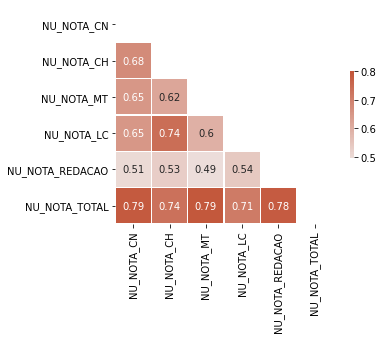

In [8]:
dadoszero = dados_sem_notas_zero.query("NU_NOTA_LC != 0 & NU_NOTA_CH !=0 & NU_NOTA_CN != 0 & NU_NOTA_MT !=0")
dadoszero.dropna()

correlacao = dadoszero[provas].corr()
correlacao

mask = np.triu(np.ones_like(correlacao, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data=correlacao, mask=mask, cmap=cmap, center= 0.45, vmax=0.8, square=True, linewidths=.1, cbar_kws={"shrink": 0.4}, annot=True)

### **Desafio 3**

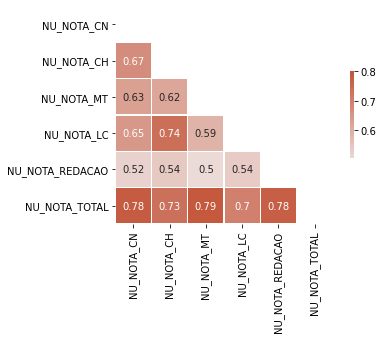

In [11]:
dadosRJ = dadoszero.query("SG_UF_RESIDENCIA == 'RJ'")
dadosRJ.dropna()

correlacao = dadosRJ[provas].corr()
correlacao

mask = np.triu(np.ones_like(correlacao, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data=correlacao, mask=mask, cmap=cmap, center= 0.45, vmax=0.8, square=True, linewidths=.1, cbar_kws={"shrink": 0.4}, annot=True)

## **Desafio 4**

Text(0.5, 1.0, 'Correlação entre Matemática e Linguages')

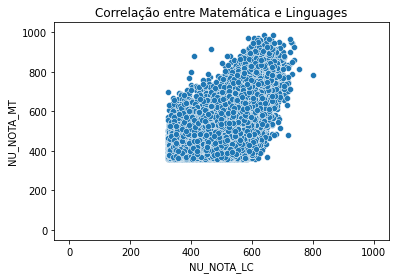

In [12]:
sns.scatterplot(data = dadoszero, x="NU_NOTA_LC", y="NU_NOTA_MT")
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))
plt.title("Correlação entre Matemática e Linguages")